In [ ]:
#Load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Load and read the data
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/data_cleaned.csv'
data = pd.read_csv(data_dir,index_col=0)
data.head()

Mounted at /content/drive


,price,bed,bath,house_size,city_enc,zip_enc,state_Puerto Rico,state_Massachusetts,state_Connecticut,state_New Jersey,state_New York,state_New Hampshire,state_Vermont,state_Rhode Island,state_Wyoming,state_Maine,state_Georgia,state_Pennsylvania,state_Delaware
0,105000.0,3.0,2.0,920.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80000.0,4.0,2.0,1527.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
2,67000.0,2.0,1.0,748.0,114611.845711,113752.971131,1,0,0,0,0,0,0,0,0,0,0,0,0
3,145000.0,4.0,2.0,1800.0,199673.107143,168305.581318,1,0,0,0,0,0,0,0,0,0,0,0,0
5,179000.0,4.0,3.0,2520.0,196619.034149,144958.974359,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Split training and test sets
X = data.drop(columns="price")           
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (57042, 18)
X Test  :  (14261, 18)
Y Train :  (57042,)
Y Test  :  (14261,)


In [ ]:
#Load XGBoost lib
from xgboost import XGBRegressor

In [ ]:
#Run basic situation and print performance
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print("XGBRegressor score:", XG.score(X_test, y_test))
print("XGBRegressor MSE:", mean_squared_error(y_test, y_pred))

[21:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor score: 0.8141391851145453
XGBRegressor MSE: 258943445117.52716


[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

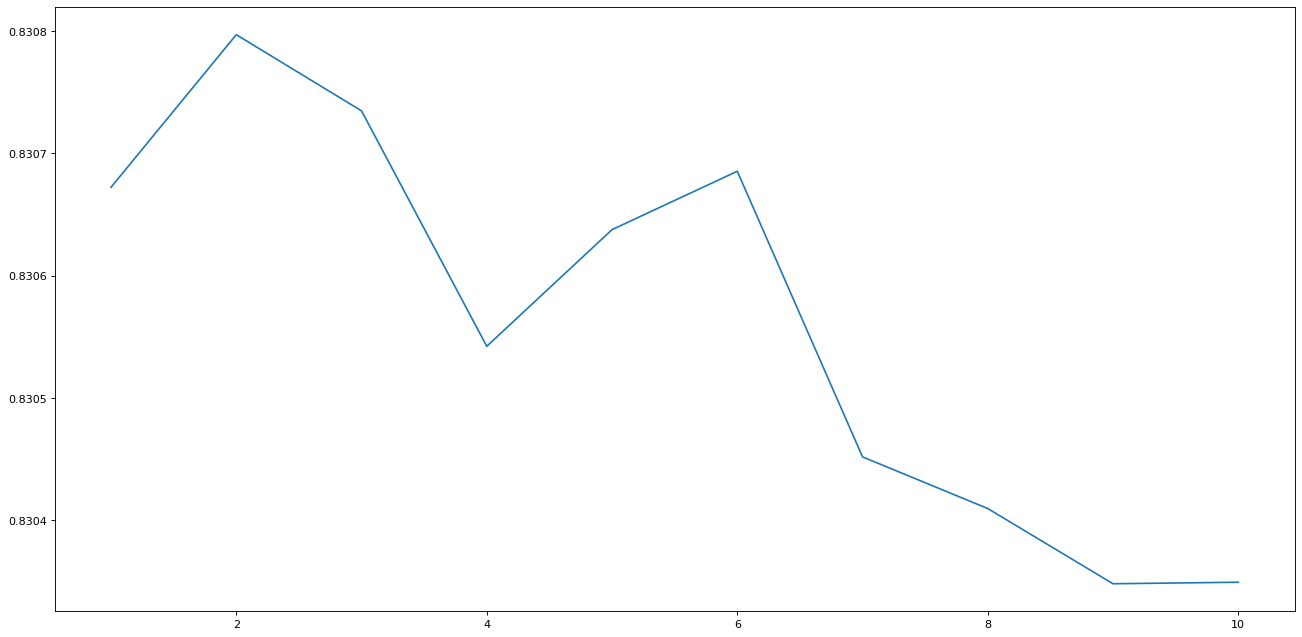

In [ ]:
#Finding the best n_estimators for model
test = []
for i in range(10):
  XGBR = XGBRegressor(n_estimators = i*25 + 1600)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

[22:05:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

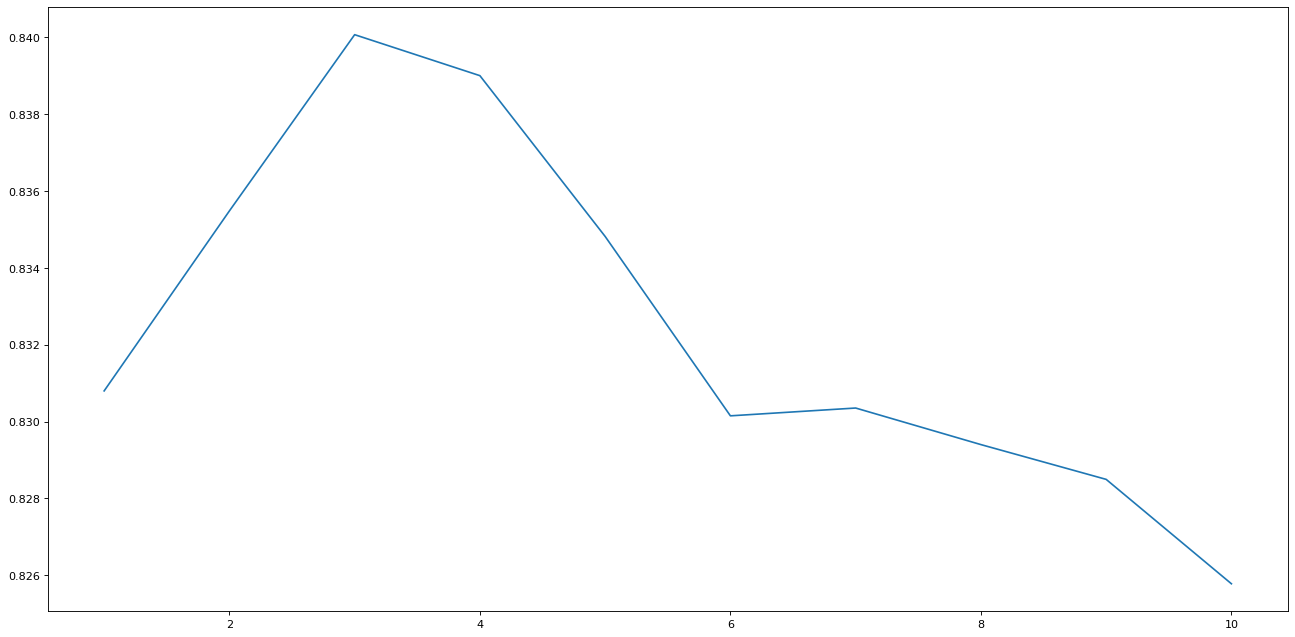

In [ ]:
#Finding the best max_depth for model
test = []
for i in range(10):
  XGBR = XGBRegressor(n_estimators = 1625, max_depth = 3 + i)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

In [ ]:
XG = XGBRegressor(n_estimators = 1625, max_depth = 5)
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print("XGBRegressor score:", XG.score(X_test, y_test))
print("XGBRegressor MSE:", mean_squared_error(y_test, y_pred))

[02:09:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor score: 0.8400621815194003
XGBRegressor MSE: 222827225563.77475


[02:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

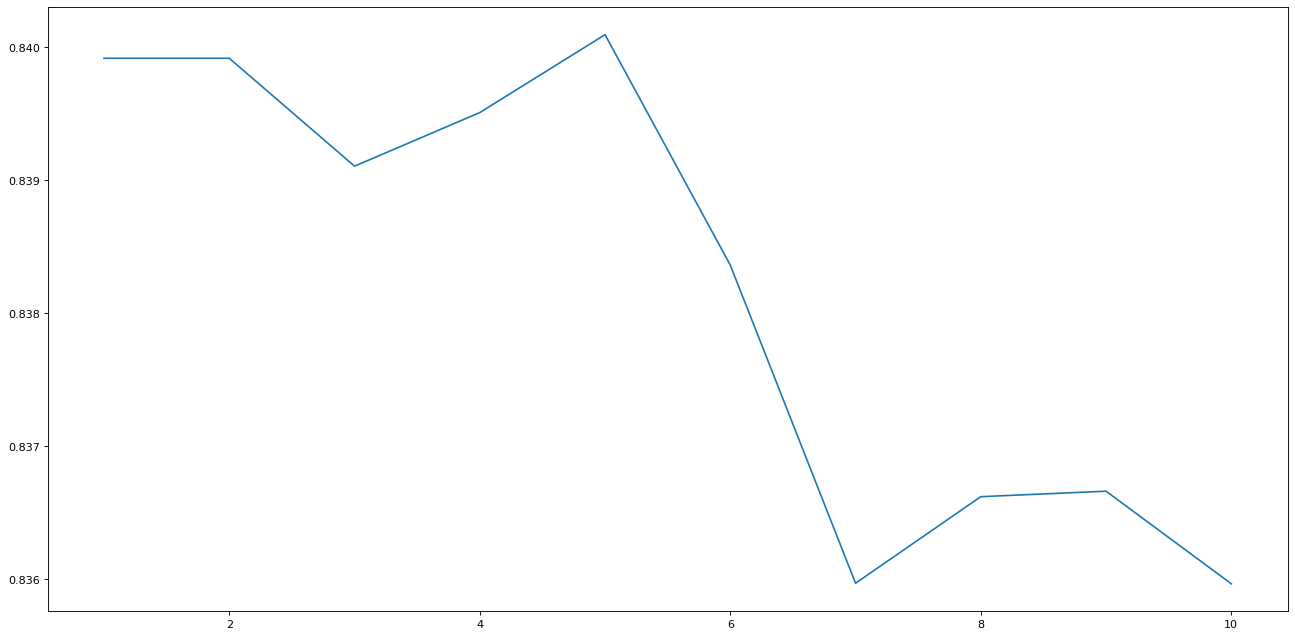

In [ ]:
#Finding the best min_child_weight for model
test = []
for i in range(10):
  XGBR = XGBRegressor(n_estimators = 1700, max_depth = 5, min_child_weight = i)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

[03:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


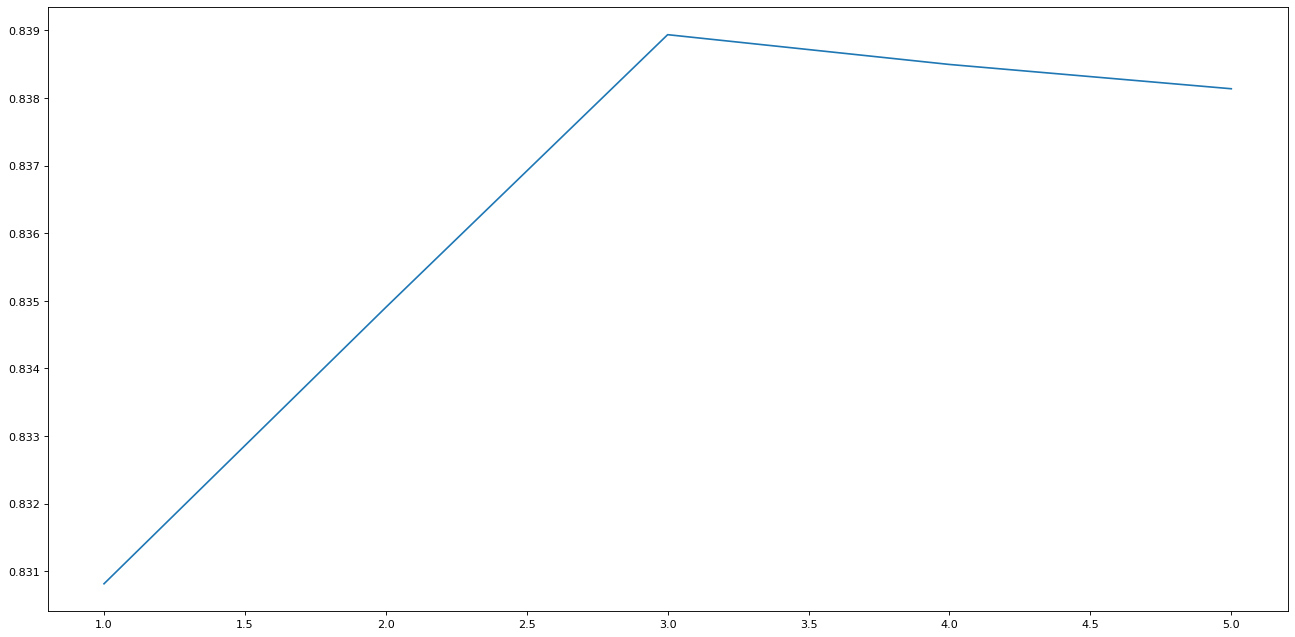

In [9]:
#Finding the best min_child_weight for model
test = []
for i in range(5):
  XGBR = XGBRegressor(n_estimators = 1625, max_depth = 5, min_child_weight = 4, learning_rate = 0.01*i + 0.01)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,6), test)
plt.show()

In [10]:
XG = XGBRegressor(n_estimators = 1625, max_depth = 5, min_child_weight = 4, learning_rate = 0.03)
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print("XGBRegressor score:", XG.score(X_test, y_test))
print("XGBRegressor MSE:", mean_squared_error(y_test, y_pred))

[03:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor score: 0.8389352745237093
XGBRegressor MSE: 224397245473.41043
